# Smartphone-Based Recognition of Human Activities Data Set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

from pyspark.sql import SQLContext, SparkSession

In [ ]:
from pyspark.mllib.stat import Statistics

In [ ]:
spark = SparkSession.Builder().appName('Project').getOrCreate()
sc = spark.sparkContext

## Data loading

In [ ]:
DATASET_PATH = "hdfs://kddrtserver10.isti.cnr.it:9000/users/hpsa10/UCI_HAR_dataset/"
train_path = f"{DATASET_PATH}train/"
test_path = f"{DATASET_PATH}test/"

In [ ]:
X_train_rdd = sc.textFile(train_path + 'X_train.txt').map(lambda x : [float(y) for y in x.strip().split()])
X_test_rdd = sc.textFile(test_path + 'X_test.txt').map(lambda x : [float(y) for y in x.strip().split()])
y_train_rdd = sc.textFile(train_path + 'y_train.txt').map(lambda x : int(x.strip()))
y_test_rdd = sc.textFile(test_path + 'y_test.txt').map(lambda x : int(x.strip()))
s_train_rdd = sc.textFile(train_path + 'subject_train.txt').map(lambda x : int(x.strip()))
s_test_rdd = sc.textFile(test_path + 'subject_test.txt').map(lambda x : int(x.strip()))

In [ ]:
X_train_idx = X_train_rdd.zipWithIndex().map(lambda x : (x[1], [x[0]]))
X_test_idx = X_test_rdd.zipWithIndex().map(lambda x : (x[1], [x[0]]))
y_train_idx = y_train_rdd.zipWithIndex().map(lambda x : (x[1], [['y', x[0]]]))
y_test_idx = y_test_rdd.zipWithIndex().map(lambda x : (x[1], [['y', x[0]]]))
s_train_idx = s_train_rdd.zipWithIndex().map(lambda x : (x[1], [['s', x[0]]]))
s_test_idx = s_test_rdd.zipWithIndex().map(lambda x : (x[1], [['s', x[0]]]))

In [ ]:
def order(x):
    for c in x[1]:
        if len(c)>2:
            X_first = c
        elif len(c)==2:
            if c[0] == 'y':
                y_second = [c[1]]
            elif c[0] == 's':
                s_third = [c[1]]
    return [X_first, y_second, s_third, [x[0]]]

In [ ]:
#Train
train_rdd = X_train_idx.union(y_train_idx).union(s_train_idx) \
.reduceByKey(lambda x,y : x + y) \
.map(order) \
.map(lambda x : [item for sublist in x for item in sublist])

df_train = train_rdd.toDF() \
.withColumnRenamed('_562', 'target') \
.withColumnRenamed('_563', 'subject') \
.withColumnRenamed('_564', 'id')

df_train.limit(5).toPandas()

_1        _2        _3        _4        _5        _6        _7  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.967186 -0.983118 -0.997003   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.984680 -0.996274 -0.999077   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.993222 -0.996128 -0.997903   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.988489 -0.993184 -0.998674   

         _8        _9       _10  ...      _555      _556      _557      _558  \
0 -0.983185 -0.923527 -0.934724  ... -0.112754  0.030400 -0.464761 -0.018446   
1 -0.966097 -0.983116 -0.940987  ... -0.212754 -0.230622  0.014637 -0.189512   
2 -0.982937 -0.996410 -0.943906  ... -0.077552 -0.101222  0.639084  0.765485   
3 -0.992711 -0.996492 -0.944870  ... -0.165849 -0.033007 -0.240572  0.788193   
4 -0.988544 -0.993287 -0.942559  ... -0.021446  0.337010 -0.436685 -0.622922   

       _559      _560      _561  target  subject  id  
0 -0.841247  0.179941 -0.058627       5        1   0  
1 -0.852150  0.182170 -0.043010       5        1   6  
2 -0.850654  0.187611 -0.035998       5        1  12  
3 -0.761052  0.262886  0.029346       5        1  18  
4 -0.758977  0.264224  0.030743       5        1  24  

[5 rows x 564 columns]

In [ ]:
#Test
test_rdd = X_test_idx.union(y_test_idx).union(s_test_idx) \
.reduceByKey(lambda x,y : x + y) \
.map(order).map(lambda x : [item for sublist in x for item in sublist])

df_test = test_rdd.toDF() \
.withColumnRenamed('_562', 'target') \
.withColumnRenamed('_563', 'subject') \
.withColumnRenamed('_564', 'id')

df_test.limit(5).toPandas()

_1        _2        _3        _4        _5        _6        _7  \
0  0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1  0.279746 -0.018271 -0.104000 -0.995819 -0.976354 -0.977725 -0.995996   
2  0.274544 -0.023145 -0.112540 -0.996205 -0.991573 -0.987518 -0.996520   
3  0.288416 -0.003485 -0.083828 -0.994571 -0.978360 -0.979943 -0.995337   
4  0.275639 -0.015566 -0.125458 -0.989161 -0.968516 -0.968723 -0.990635   

         _8        _9       _10  ...      _555      _556      _557      _558  \
0 -0.925249 -0.674302 -0.894088  ...  0.006462  0.162920 -0.825886  0.271151   
1 -0.973665 -0.979253 -0.937856  ... -0.309083 -0.000857  0.728514 -0.333771   
2 -0.992061 -0.987128 -0.941286  ... -0.019406 -0.202773 -0.114963 -0.157723   
3 -0.976731 -0.977797 -0.938281  ...  0.034578 -0.339566 -0.709440  0.396758   
4 -0.969443 -0.967756 -0.930510  ...  0.128368 -0.399203 -0.008751 -0.333382   

       _559      _560      _561  target  subject  id  
0 -0.720009  0.276801 -0.057978       5        2   0  
1 -0.690085  0.295282 -0.067065       5        2   6  
2 -0.683619  0.299401 -0.068704       5        2  12  
3 -0.594755  0.377131 -0.004721       5        2  18  
4 -0.601530  0.368305 -0.034342       5        2  24  

[5 rows x 564 columns]

In [ ]:
#Train + Test
all_rdd =train_rdd.union(test_rdd).map(lambda x : x[0:563])

df_all= all_rdd.toDF() \
.withColumnRenamed('_562', 'target') \
.withColumnRenamed('_563', 'subject')

df_all.limit(5).toPandas()

_1        _2        _3        _4        _5        _6        _7  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.967186 -0.983118 -0.997003   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.984680 -0.996274 -0.999077   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.993222 -0.996128 -0.997903   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.988489 -0.993184 -0.998674   

         _8        _9       _10  ...      _554      _555      _556      _557  \
0 -0.983185 -0.923527 -0.934724  ... -0.710304 -0.112754  0.030400 -0.464761   
1 -0.966097 -0.983116 -0.940987  ... -0.564430 -0.212754 -0.230622  0.014637   
2 -0.982937 -0.996410 -0.943906  ... -0.878751 -0.077552 -0.101222  0.639084   
3 -0.992711 -0.996492 -0.944870  ... -0.838243 -0.165849 -0.033007 -0.240572   
4 -0.988544 -0.993287 -0.942559  ... -0.941664 -0.021446  0.337010 -0.436685   

       _558      _559      _560      _561  target  subject  
0 -0.018446 -0.841247  0.179941 -0.058627       5        1  
1 -0.189512 -0.852150  0.182170 -0.043010       5        1  
2  0.765485 -0.850654  0.187611 -0.035998       5        1  
3  0.788193 -0.761052  0.262886  0.029346       5        1  
4 -0.622922 -0.758977  0.264224  0.030743       5        1  

[5 rows x 563 columns]

## Data Understanding

In [ ]:
df_all.toPandas().describe()

_1            _2            _3            _4            _5  \
count  10299.000000  10299.000000  10299.000000  10299.000000  10299.000000   
mean       0.274347     -0.017743     -0.108925     -0.607784     -0.510191   
std        0.067628      0.037128      0.053033      0.438694      0.500240   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.262625     -0.024902     -0.121019     -0.992360     -0.976990   
50%        0.277174     -0.017162     -0.108596     -0.943030     -0.835032   
75%        0.288354     -0.010625     -0.097589     -0.250293     -0.057336   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 _6            _7            _8            _9           _10  \
count  10299.000000  10299.000000  10299.000000  10299.000000  10299.000000   
mean      -0.613064     -0.633593     -0.525697     -0.614989     -0.466732   
std        0.403657      0.413333      0.484201      0.399034      0.538707   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -0.979137     -0.993293     -0.977017     -0.979064     -0.935788   
50%       -0.850773     -0.948244     -0.843670     -0.845068     -0.874825   
75%       -0.278737     -0.302033     -0.087405     -0.288149     -0.014641   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...          _554          _555          _556          _557  \
count  ...  10299.000000  10299.000000  10299.000000  10299.000000   
mean   ...     -0.617700      0.007705      0.002648      0.017683   
std    ...      0.308796      0.336591      0.447364      0.616188   
min    ...     -1.000000     -1.000000     -1.000000     -1.000000   
25%    ...     -0.841847     -0.124694     -0.287031     -0.493108   
50%    ...     -0.703402      0.008146      0.007668      0.017192   
75%    ...     -0.487981      0.149005      0.291490      0.536137   
max    ...      1.000000      1.000000      1.000000      1.000000   

               _558          _559          _560          _561        target  \
count  10299.000000  10299.000000  10299.000000  10299.000000  10299.000000   
mean      -0.009219     -0.496522      0.063255     -0.054284      3.624624   
std        0.484770      0.511158      0.305468      0.268898      1.743695   
min       -1.000000     -1.000000     -1.000000     -1.000000      1.000000   
25%       -0.389041     -0.817288      0.002151     -0.131880      2.000000   
50%       -0.007186     -0.715631      0.182028     -0.003882      4.000000   
75%        0.365996     -0.521503      0.250790      0.102970      5.000000   
max        1.000000      1.000000      1.000000      1.000000      6.000000   

            subject  
count  10299.000000  
mean      16.146422  
std        8.679067  
min        1.000000  
25%        9.000000  
50%       17.000000  
75%       24.000000  
max       30.000000  

[8 rows x 563 columns]

In [ ]:
#Non ci sono missing values
from pyspark.sql.functions import isnull, when, count, col
nacounts = df_all.select([count(when(isnull(c), c)).alias(c) for c in df_all.columns]).toPandas()
nacounts.values.sum()

0

In [ ]:
summary = Statistics.colStats(all_rdd.map(lambda x : x[0:561]))

In [ ]:
#Le variabili del dataset sono già tutte normalizzate tra -1 e 1
summary.min().any() < -1, summary.max().any() > 1

(False, False)

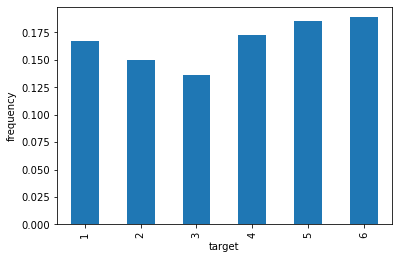

In [ ]:
#Target distribution
df_all.toPandas()['target'].value_counts(normalize=True, sort=False).plot(kind='bar', ylabel='frequency', xlabel='target')
plt.show()

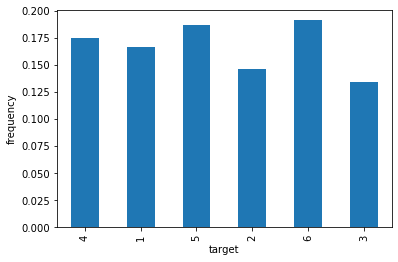

In [ ]:
#Target distribution in Training Set
df_train.toPandas()['target'].value_counts(normalize=True, sort=False).plot(kind='bar', ylabel='frequency', xlabel='target')
plt.show()

In [ ]:
#Target distribution in Test Set
df_test.toPandas()['target'].value_counts(normalize=True, sort=False).plot(kind='bar', ylabel='frequency', xlabel='target')
plt.show()

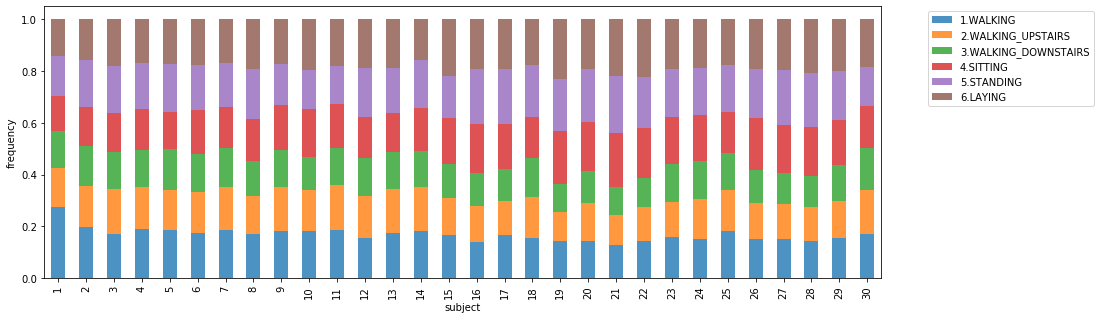

In [ ]:
#Target distribution by subject
df_all.toPandas()['target'].groupby(df_all.toPandas()['subject']).value_counts(normalize=True, sort=False).unstack(1).plot(kind='bar', alpha = 0.8, stacked=True, figsize=(15,5), ylabel='frequency', xlabel='subject')
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Clustering

### Pre-Processing

In [ ]:
r=Statistics.corr(all_rdd.map(lambda x : x[0:561]))

In [ ]:
r_sup=np.matrix(np.triu(np.abs(r), k=1))

In [ ]:
idx=0
var_dict = {}
for corr in r_sup:
    var_dict[idx]=np.argwhere(corr>0.7)[:,1]
    idx+=1

In [ ]:
#Selection of feauters with Pearson's pair-correlation < 0.7
var_ok = np.arange(len(r))
for key in var_dict:
    if key in var_ok:
        var_ok=np.setdiff1d(var_ok, var_dict[key])
var_ok+=1
columns_ok=np.char.add('_', var_ok.astype(str)).tolist()
columns_ok.append('target')

In [ ]:
df_cluster=df_all[columns_ok]
df_cluster.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _527      _533      _538      _540  \
0  0.264106 -0.095246  0.278851  ... -0.516080 -0.989498 -1.000000  0.586156   
1  0.138057 -0.036769  0.231401  ... -0.668835 -0.994521 -1.000000 -0.321591   
2  0.137176 -0.132037  0.270602  ... -0.522725 -0.998603 -1.000000 -0.391155   
3  0.279529 -0.092519  0.461362  ... -0.653090 -0.998252 -0.692308 -0.410712   
4  0.087368 -0.024368  0.420898  ... -0.625977 -0.995606 -0.948718 -0.757406   

       _546      _551      _553      _555      _558  target  
0 -0.991048 -1.000000 -0.298676 -0.112754 -0.018446       5  
1 -0.996934 -1.000000 -0.217198 -0.212754 -0.189512       5  
2 -0.997234 -0.873016 -0.686389 -0.077552  0.765485       5  
3 -0.998589 -1.000000 -0.501301 -0.165849  0.788193       5  
4 -0.995403 -0.333333 -0.746382 -0.021446 -0.622922       5  

[5 rows x 137 columns]

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(
    inputCols=df_cluster.columns[0:136],
    outputCol="features")

In [ ]:
X = assembler.transform(df_cluster)
X.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _533      _538      _540      _546  \
0  0.264106 -0.095246  0.278851  ... -0.989498 -1.000000  0.586156 -0.991048   
1  0.138057 -0.036769  0.231401  ... -0.994521 -1.000000 -0.321591 -0.996934   
2  0.137176 -0.132037  0.270602  ... -0.998603 -1.000000 -0.391155 -0.997234   
3  0.279529 -0.092519  0.461362  ... -0.998252 -0.692308 -0.410712 -0.998589   
4  0.087368 -0.024368  0.420898  ... -0.995606 -0.948718 -0.757406 -0.995403   

       _551      _553      _555      _558  target  \
0 -1.000000 -0.298676 -0.112754 -0.018446       5   
1 -1.000000 -0.217198 -0.212754 -0.189512       5   
2 -0.873016 -0.686389 -0.077552  0.765485       5   
3 -1.000000 -0.501301 -0.165849  0.788193       5   
4 -0.333333 -0.746382 -0.021446 -0.622922       5   

                                            features  
0  [0.28858451, -0.020294171, -0.13290514, -0.995...  
1  [0.27945388, -0.019640776, -0.11002215, -0.996...  
2  [0.278457, -0.020414761, -0.11273172, -0.99913...  
3  [0.27773106, -0.018210718, -0.10918803, -0.997...  
4  [0.28171549, -0.011910678, -0.10287513, -0.998...  

[5 rows x 138 columns]

In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model=pca.fit(X)
X = pca_model.transform(X)

In [ ]:
X.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _538      _540      _546      _551  \
0  0.264106 -0.095246  0.278851  ... -1.000000  0.586156 -0.991048 -1.000000   
1  0.138057 -0.036769  0.231401  ... -1.000000 -0.321591 -0.996934 -1.000000   
2  0.137176 -0.132037  0.270602  ... -1.000000 -0.391155 -0.997234 -0.873016   
3  0.279529 -0.092519  0.461362  ... -0.692308 -0.410712 -0.998589 -1.000000   
4  0.087368 -0.024368  0.420898  ... -0.948718 -0.757406 -0.995403 -0.333333   

       _553      _555      _558  target  \
0 -0.298676 -0.112754 -0.018446       5   
1 -0.217198 -0.212754 -0.189512       5   
2 -0.686389 -0.077552  0.765485       5   
3 -0.501301 -0.165849  0.788193       5   
4 -0.746382 -0.021446 -0.622922       5   

                                            features  \
0  [0.28858451, -0.020294171, -0.13290514, -0.995...   
1  [0.27945388, -0.019640776, -0.11002215, -0.996...   
2  [0.278457, -0.020414761, -0.11273172, -0.99913...   
3  [0.27773106, -0.018210718, -0.10918803, -0.997...   
4  [0.28171549, -0.011910678, -0.10287513, -0.998...   

                                  pca_features  
0    [-2.6778139059892805, 0.7431648443074377]  
1    [-2.682325177024618, -0.1633106023234536]  
2  [-3.5209189523738895, -0.07463574696155881]  
3    [-2.920829832295895, -0.8572349590170316]  
4   [-3.4427796355213016, -0.7583453620251434]  

[5 rows x 139 columns]

In [ ]:
pca_features = np.stack(X.select('pca_features').toPandas()['pca_features'].apply(lambda x : x.tolist()), axis=0)

In [ ]:
pd.DataFrame(pca_features).head()

0         1
0 -2.677814  0.743165
1 -2.682325 -0.163311
2 -3.520919 -0.074636
3 -2.920830 -0.857235
4 -3.442780 -0.758345

### K-means con K=2

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
kmeans_2 = KMeans(featuresCol='features', predictionCol='cluster_label', k=2, maxIter=300, initSteps=10, seed=1)
model_2 = kmeans_2.fit(X)
centers_2 = model_2.clusterCenters()
transformed_2 = model_2.transform(X)

In [ ]:
transformed_2.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _540      _546      _551      _553  \
0  0.264106 -0.095246  0.278851  ...  0.586156 -0.991048 -1.000000 -0.298676   
1  0.138057 -0.036769  0.231401  ... -0.321591 -0.996934 -1.000000 -0.217198   
2  0.137176 -0.132037  0.270602  ... -0.391155 -0.997234 -0.873016 -0.686389   
3  0.279529 -0.092519  0.461362  ... -0.410712 -0.998589 -1.000000 -0.501301   
4  0.087368 -0.024368  0.420898  ... -0.757406 -0.995403 -0.333333 -0.746382   

       _555      _558  target  \
0 -0.112754 -0.018446       5   
1 -0.212754 -0.189512       5   
2 -0.077552  0.765485       5   
3 -0.165849  0.788193       5   
4 -0.021446 -0.622922       5   

                                            features  \
0  [0.28858451, -0.020294171, -0.13290514, -0.995...   
1  [0.27945388, -0.019640776, -0.11002215, -0.996...   
2  [0.278457, -0.020414761, -0.11273172, -0.99913...   
3  [0.27773106, -0.018210718, -0.10918803, -0.997...   
4  [0.28171549, -0.011910678, -0.10287513, -0.998...   

                                  pca_features  cluster_label  
0    [-2.6778139059892805, 0.7431648443074377]              0  
1    [-2.682325177024618, -0.1633106023234536]              0  
2  [-3.5209189523738895, -0.07463574696155881]              0  
3    [-2.920829832295895, -0.8572349590170316]              0  
4   [-3.4427796355213016, -0.7583453620251434]              0  

[5 rows x 140 columns]

In [ ]:
df_cluster_2=transformed_2.toPandas()

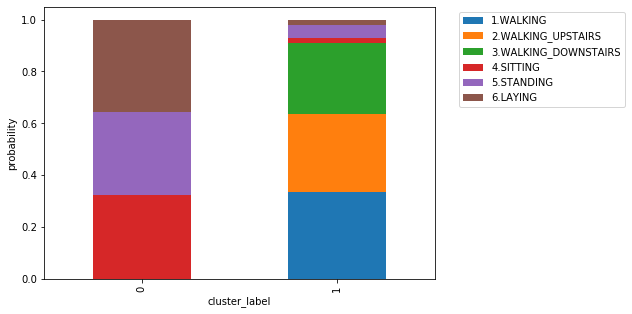

In [ ]:
#Target probability within each cluster
df_cluster_2['target'].groupby(df_cluster_2['cluster_label']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True, ylabel='probability',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Bar_plot_2.png')
plt.show()


In [ ]:
#Target count within each cluster
df_cluster_2['target'].groupby(df_cluster_2['cluster_label']).value_counts().unstack(1).plot(kind='bar', stacked=True, ylabel='count',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
evaluator = ClusteringEvaluator(predictionCol='cluster_label',featuresCol='features')

silhouette = evaluator.evaluate(transformed_2)
print("Silhouette with squared euclidean distance = " + str(silhouette))

sse=model_2.summary.trainingCost
print("Within Set Sum of Squared Errors = " + str(sse))

Silhouette with squared euclidean distance = 0.23347794179518447
Within Set Sum of Squared Errors = 93420.82209489543


### K-means con K=6

In [ ]:
kmeans_6 = KMeans(featuresCol='features', predictionCol='cluster_label', k=6, maxIter=300, initSteps=10, seed=1)
model_6 = kmeans_6.fit(X)
centers_6 = model_6.clusterCenters()
transformed_6 = model_6.transform(X)

In [ ]:
transformed_6.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _540      _546      _551      _553  \
0  0.264106 -0.095246  0.278851  ...  0.586156 -0.991048 -1.000000 -0.298676   
1  0.138057 -0.036769  0.231401  ... -0.321591 -0.996934 -1.000000 -0.217198   
2  0.137176 -0.132037  0.270602  ... -0.391155 -0.997234 -0.873016 -0.686389   
3  0.279529 -0.092519  0.461362  ... -0.410712 -0.998589 -1.000000 -0.501301   
4  0.087368 -0.024368  0.420898  ... -0.757406 -0.995403 -0.333333 -0.746382   

       _555      _558  target  \
0 -0.112754 -0.018446       5   
1 -0.212754 -0.189512       5   
2 -0.077552  0.765485       5   
3 -0.165849  0.788193       5   
4 -0.021446 -0.622922       5   

                                            features  \
0  [0.28858451, -0.020294171, -0.13290514, -0.995...   
1  [0.27945388, -0.019640776, -0.11002215, -0.996...   
2  [0.278457, -0.020414761, -0.11273172, -0.99913...   
3  [0.27773106, -0.018210718, -0.10918803, -0.997...   
4  [0.28171549, -0.011910678, -0.10287513, -0.998...   

                                  pca_features  cluster_label  
0    [-2.6778139059892805, 0.7431648443074377]              2  
1    [-2.682325177024618, -0.1633106023234536]              2  
2  [-3.5209189523738895, -0.07463574696155881]              4  
3    [-2.920829832295895, -0.8572349590170316]              2  
4   [-3.4427796355213016, -0.7583453620251434]              4  

[5 rows x 140 columns]

In [ ]:
df_cluster_6=transformed_6.toPandas()

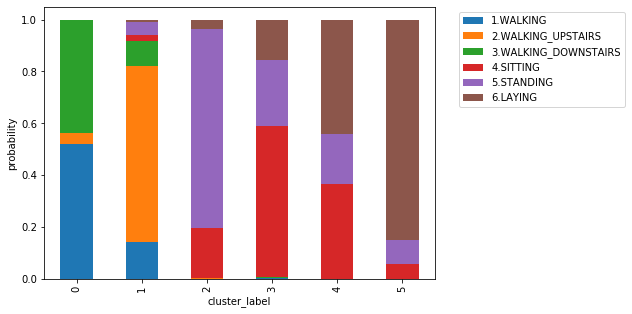

In [ ]:
#Target probability within each cluster
df_cluster_6['target'].groupby(df_cluster_6['cluster_label']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True, ylabel='probability',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Bar_plot_6.png')
plt.show()


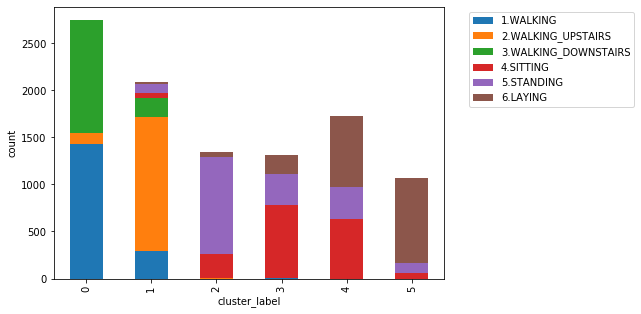

In [ ]:
#Target count within each cluster
df_cluster_6['target'].groupby(df_cluster_6['cluster_label']).value_counts().unstack(1).plot(kind='bar', stacked=True, ylabel='count',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
evaluator = ClusteringEvaluator(predictionCol='cluster_label',featuresCol='features')

silhouette = evaluator.evaluate(transformed_6)
print("Silhouette with squared euclidean distance = " + str(silhouette))
sse=model_6.summary.trainingCost
print("Within Set Sum of Squared Errors = " + str(sse))

Silhouette with squared euclidean distance = 0.15170405514378849
Within Set Sum of Squared Errors = 78706.18794558475


### K-means con K=12

In [ ]:
kmeans_12 = KMeans(featuresCol='features', predictionCol='cluster_label', k=12, maxIter=300, initSteps=10, seed=1)
model_12 = kmeans_12.fit(X)
centers_12 = model_12.clusterCenters()
transformed_12 = model_12.transform(X)

In [ ]:
transformed_12.limit(5).toPandas()

_1        _2        _3        _4       _27       _29       _30  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.853011 -0.058526  0.256892   
1  0.279454 -0.019641 -0.110022 -0.996921 -0.233335  0.069525  0.064297   
2  0.278457 -0.020415 -0.112732 -0.999135 -0.046058  0.004907  0.296516   
3  0.277731 -0.018211 -0.109188 -0.997491 -0.135413  0.364225  0.201387   
4  0.281715 -0.011911 -0.102875 -0.998534 -0.011826  0.205731  0.213469   

        _32       _33       _34  ...      _540      _546      _551      _553  \
0  0.264106 -0.095246  0.278851  ...  0.586156 -0.991048 -1.000000 -0.298676   
1  0.138057 -0.036769  0.231401  ... -0.321591 -0.996934 -1.000000 -0.217198   
2  0.137176 -0.132037  0.270602  ... -0.391155 -0.997234 -0.873016 -0.686389   
3  0.279529 -0.092519  0.461362  ... -0.410712 -0.998589 -1.000000 -0.501301   
4  0.087368 -0.024368  0.420898  ... -0.757406 -0.995403 -0.333333 -0.746382   

       _555      _558  target  \
0 -0.112754 -0.018446       5   
1 -0.212754 -0.189512       5   
2 -0.077552  0.765485       5   
3 -0.165849  0.788193       5   
4 -0.021446 -0.622922       5   

                                            features  \
0  [0.28858451, -0.020294171, -0.13290514, -0.995...   
1  [0.27945388, -0.019640776, -0.11002215, -0.996...   
2  [0.278457, -0.020414761, -0.11273172, -0.99913...   
3  [0.27773106, -0.018210718, -0.10918803, -0.997...   
4  [0.28171549, -0.011910678, -0.10287513, -0.998...   

                                  pca_features  cluster_label  
0    [-2.6778139059892805, 0.7431648443074377]              4  
1    [-2.682325177024618, -0.1633106023234536]              4  
2  [-3.5209189523738895, -0.07463574696155881]              8  
3    [-2.920829832295895, -0.8572349590170316]              4  
4   [-3.4427796355213016, -0.7583453620251434]              4  

[5 rows x 140 columns]

In [ ]:
df_cluster_12=transformed_12.toPandas()

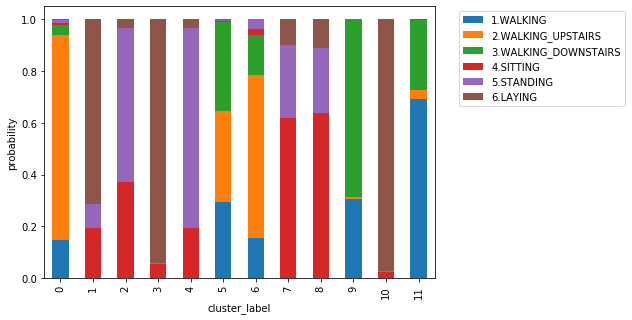

In [ ]:
#Target probability within each cluster
df_cluster_12['target'].groupby(df_cluster_12['cluster_label']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True, ylabel='probability',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Bar_plot_12.png')
plt.show()

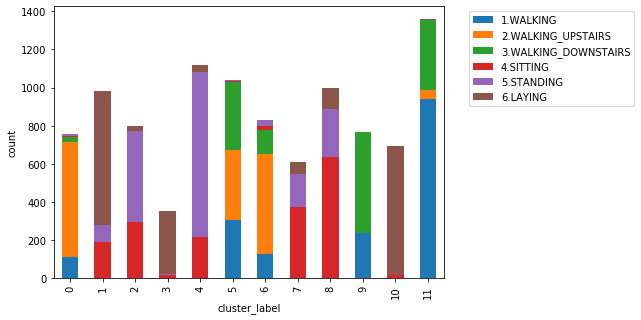

In [ ]:
#Target count within each cluster
df_cluster_12['target'].groupby(df_cluster_12['cluster_label']).value_counts().unstack(1).plot(kind='bar', stacked=True, ylabel='count',figsize=(7,5))
plt.legend(['1.WALKING','2.WALKING_UPSTAIRS','3.WALKING_DOWNSTAIRS','4.SITTING','5.STANDING','6.LAYING'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
evaluator = ClusteringEvaluator(predictionCol='cluster_label',featuresCol='features')

silhouette = evaluator.evaluate(transformed_12)
print("Silhouette with squared euclidean distance = " + str(silhouette))
sse=model_12.summary.trainingCost
print("Within Set Sum of Squared Errors = " + str(sse))

Silhouette with squared euclidean distance = 0.1270075800670821
Within Set Sum of Squared Errors = 71653.85299788696


### Clusters Visualization

In [ ]:
dfp_cluster = pd.DataFrame(pca_features)
dfp_cluster = dfp_cluster.rename(columns={0: "pca_1", 1: "pca_2"})
dfp_cluster['target'] = df_cluster_2['target']
dfp_cluster['cluster_label_2'] = df_cluster_2['cluster_label']
dfp_cluster['cluster_label_6'] = df_cluster_6['cluster_label']
dfp_cluster['cluster_label_12'] = df_cluster_12['cluster_label']
dfp_cluster.head()

pca_1     pca_2  target  cluster_label_2  cluster_label_6  \
0 -2.677814  0.743165       5                0                2   
1 -2.682325 -0.163311       5                0                2   
2 -3.520919 -0.074636       5                0                4   
3 -2.920830 -0.857235       5                0                2   
4 -3.442780 -0.758345       5                0                4   

   cluster_label_12  
0                 4  
1                 4  
2                 8  
3                 4  
4                 4

In [ ]:
alt.Chart(dfp_cluster).mark_point().encode(
    x= alt.X('pca_1:Q'),
    y= alt.Y('pca_2:Q'),
    color=alt.Color("target:N", legend=alt.Legend(title="Target"))
).properties(height= 300, width=400)

alt.Chart(...)

In [ ]:
#K-means k=2
alt.Chart(dfp_cluster).mark_point().encode(
    x= alt.X('pca_1:Q'),
    y= alt.Y('pca_2:Q'),
    color=alt.Color("cluster_label_2:N", legend=alt.Legend(title="Clusters"))
).properties(height= 300, width=400)

alt.Chart(...)

In [ ]:
#K-means k=6
alt.Chart(dfp_cluster).mark_point().encode(
    x= alt.X('pca_1:Q'),
    y= alt.Y('pca_2:Q'),
    color=alt.Color("cluster_label_6:N", legend=alt.Legend(title="Clusters"))
).properties(height= 300, width=400)

alt.Chart(...)

In [ ]:
#K-means k=12
alt.Chart(dfp_cluster).mark_point().encode(
    x= alt.X('pca_1:Q'),
    y= alt.Y('pca_2:Q'),
    color=alt.Color("cluster_label_12:N", legend=alt.Legend(title="Clusters"))
).properties(height= 300, width=400)

alt.Chart(...)

## Classification

### Pre-Processing

In [ ]:
assembler = VectorAssembler(
    inputCols=df_train.columns[0:561],
    outputCol="features")

In [ ]:
X_y_train = assembler.transform(df_train).select("features", "target")
X_y_train.limit(5).toPandas()

features  target
0  [0.28858451, -0.020294171, -0.13290514, -0.995...       5
1  [0.27945388, -0.019640776, -0.11002215, -0.996...       5
2  [0.278457, -0.020414761, -0.11273172, -0.99913...       5
3  [0.27773106, -0.018210718, -0.10918803, -0.997...       5
4  [0.28171549, -0.011910678, -0.10287513, -0.998...       5

In [ ]:
X_y_test = assembler.transform(df_test).select("features", "target")
X_y_test.limit(5).toPandas()

features  target
0  [0.25717778, -0.02328523, -0.014653762, -0.938...       5
1  [0.27974586, -0.018271026, -0.10399988, -0.995...       5
2  [0.27454383, -0.023145294, -0.1125396, -0.9962...       5
3  [0.28841575, -0.003485395, -0.083827858, -0.99...       5
4  [0.27563911, -0.015565524, -0.1254582, -0.9891...       5

### Random Forest  (Cross Validation)

In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
rf = RandomForestClassifier(labelCol="target", featuresCol="features", numTrees=100)
eval_f1 = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='target', metricName='f1')
eval_acc = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='target', metricName='accuracy')

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [2, 5, 10]) \
    .addGrid(rf.minInstancesPerNode, [1, 10, 100])\
    .build()

In [ ]:
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=eval_f1,
                          numFolds=3)

In [ ]:
cvModel = crossval.fit(X_y_train)

In [ ]:
#Best Model 
cvModel.bestModel.getMinInstancesPerNode(), cvModel.bestModel.getMaxDepth()

(1, 10)

In [ ]:
prediction = cvModel.transform(X_y_test)

In [ ]:
prediction.limit(2).toPandas()

features  target  \
0  [0.25717778, -0.02328523, -0.014653762, -0.938...       5   
1  [0.27974586, -0.018271026, -0.10399988, -0.995...       5   

                                       rawPrediction  \
0  [0.0, 0.029286096081840053, 1.0206854613784326...   
1  [0.0, 0.012843780538880358, 0.0031685714231374...   

                                         probability  prediction  
0  [0.0, 0.00029286096081840063, 0.01020685461378...         5.0  
1  [0.0, 0.00012843780538880354, 3.16857142313741...         5.0

In [ ]:
eval_f1.evaluate(prediction), eval_acc.evaluate(prediction)

(0.9213231639639281, 0.9216152019002375)

In [ ]:
feature_imp = cvModel.bestModel.featureImportances

In [ ]:
#Features importance
np.set_printoptions(suppress=True)
a = np.transpose(np.array([feature_imp.values,feature_imp.indices]))
np.sort(a[a[:,0]>0.02], axis=0)[::-1]+[0,1]

array([[  0.04583036, 560.        ],
       [  0.03512471, 559.        ],
       [  0.02934333,  57.        ],
       [  0.02824588,  53.        ],
       [  0.02794744,  51.        ],
       [  0.0279008 ,  50.        ],
       [  0.02496128,  42.        ],
       [  0.02485027,  41.        ]])

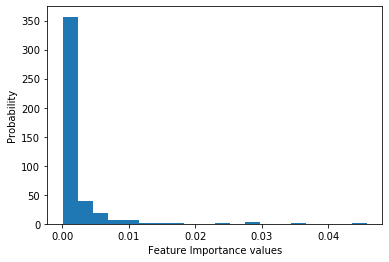

In [ ]:
#Histogram of Feature Importance values
plt.hist(a[:,0], bins=20, density=True)
plt.xlabel('Feature Importance values')
plt.ylabel('Probability')
plt.show()

In [ ]:
print(cvModel.bestModel.trees[0].toDebugString)

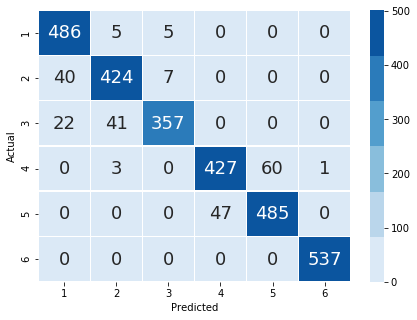

In [ ]:
import seaborn as sn

plt.figure(figsize=(7,5))
confusion_matrix = pd.crosstab(df_prediction['target'], df_prediction['prediction'].astype(int), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g', annot_kws={"size": 18}, robust=True, cbar=True, cmap=sn.color_palette("Blues"), linewidths=0.5)
plt.show()

In [ ]:
#PCA Test Set
y = assembler.transform(df_test)
y = pca_model.transform(y)
pca_features_test = np.stack(y.select('pca_features').toPandas()['pca_features'].apply(lambda x : x.tolist()), axis=0)

In [ ]:
#2d Visualizion: Target Prediction 
dfp_prediction = pd.DataFrame(pca_features_test)
dfp_prediction = dfp_prediction.rename(columns={0: "pca_1", 1: "pca_2"})
dfp_prediction['prediction'] = prediction.select('prediction').toPandas()['prediction']
dfp_prediction['target'] = df_test.select('target').toPandas()['target']

alt.Chart(dfp_prediction).mark_point().encode(
    x= alt.X('pca_1:Q'),
    y= alt.Y('pca_2:Q'),
    color=alt.Color("prediction:N", legend=alt.Legend(title="Target Prediction"))
).properties(height= 300, width=400)

alt.Chart(...)

In [ ]:
sc.stop()

In [ ]:
spark.stop()